In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

Please refer to the dataset in the repo, it is a pre-processed dataset, named "auto-mpg-processed.csv".  The steps on how the dataset was pre-processed, please refer to the notebook "Pre-processing data for Linear Regression"

In [37]:
automobile_df = pd.read_csv('/automobiles/auto-mpg-processed.csv')

automobile_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,50
1,15.0,8,350.0,165,3693,11.5,50
2,18.0,8,318.0,150,3436,11.0,50
3,16.0,8,304.0,150,3433,12.0,50
4,17.0,8,302.0,140,3449,10.5,50


In [38]:
#Creating a dictionary that will hold results of training and test scores from the regression models

result_dict = {}

In [39]:
# Creating a helper function that will build and train different regression models

def build_model(regression_fn,
               name_of_y_col,
               names_of_x_cols,
               dataset,
               test_frac=0.2,
               preprocess_fn=None,
               show_plot_Y=False,
               show_plot_scatter=False):
# regression_fn = type of regression model chosen
# test_frac describes the test sample size
# preprocess_fn = if you want to preprocess the data; eg standardize
    
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    # Splitting the data into train and test
    x_train, x_test, y_train, y_test=  train_test_split(X,Y,test_size=test_frac)
    
    # Run the regression model, get training and testing scores
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training Score: ", model.score(x_train,y_train))
    print("Test Score: ", r2_score(y_test,y_pred))
    
    if show_plot_Y == True:
        fig, x = plt.subplots(figsize=(12,8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12,8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        plt.legend(['Predicted line','Observed data'])
        plt.show()
        # the above plot only holds true if it is a simple regression (one dependent variable)
        
    #Return the train and test scores-
    return{
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [40]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [41]:
# Run a trial simple linear regression

def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.6963472137004553
Test Score:  0.6623456526304518


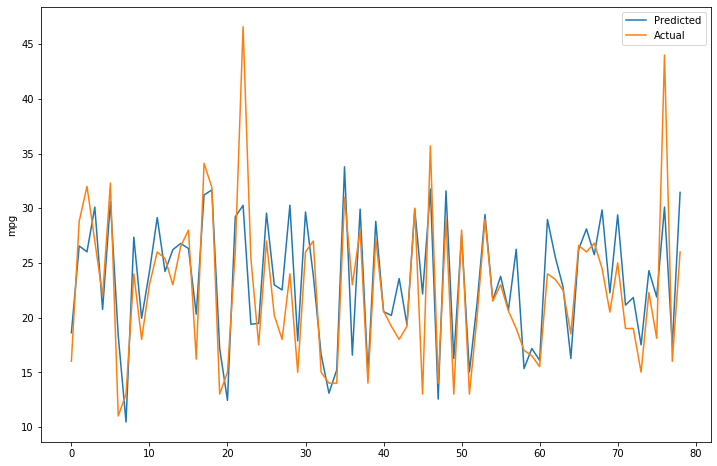

In [42]:
#Test case 1- with one feature
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                automobile_df,
                                                show_plot_Y=True)

Training Score:  0.7130875992244909
Test Score:  0.6765805353322207


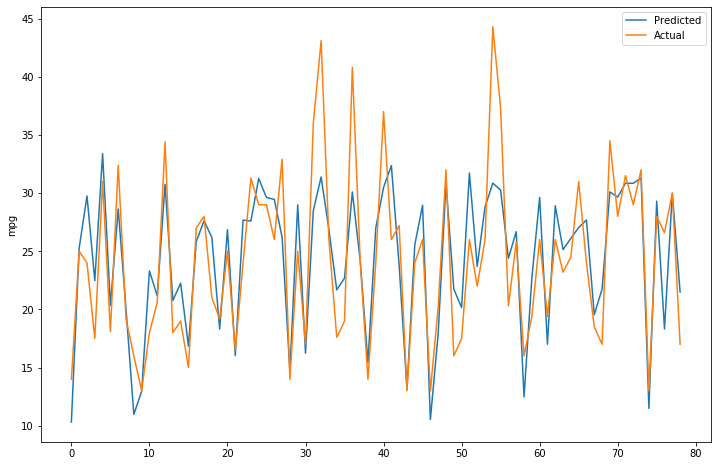

In [43]:
#Test case 2- with multiple features

result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Training Score:  0.7083103243728982
Test Score:  0.6946626252292911


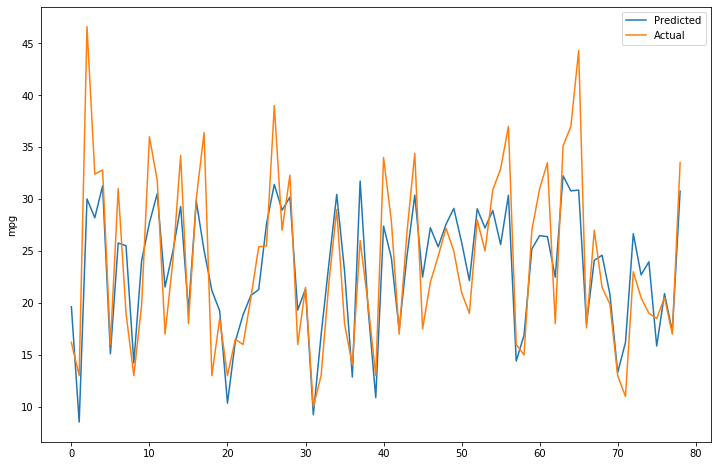

In [44]:
#Test case 3- Being selective about the number of features used

result_dict['mpg ~ parsimonious_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                      ['horsepower',
                                                      'weight'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [45]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911



In [47]:
# Lasso regression function- uses L1 Norm, reduces the magnitude of large regression coeffs
# Default value for alpha = 1, when alpha=0 it becomes OLS

def lasso_reg(x_train, y_train, alpha=0.5):
    model=Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.706070502455352
Test Score:  0.7075699127008527


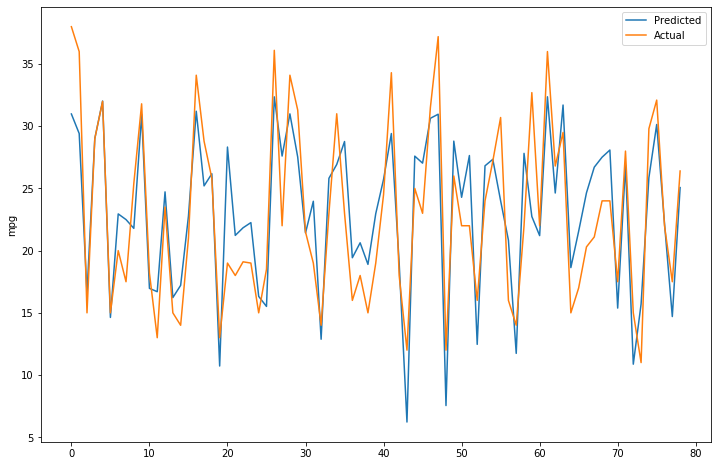

In [48]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [49]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.706070502455352
Test score 0.7075699127008527



In [51]:
# Ridge regression- uses L2 Norm
# Larger alpha values imply stronger regularization. Alpha should be +ve, floating point

def ridge_reg(x_train,y_train,alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.6791278821620288
Test Score:  0.6805375155661832


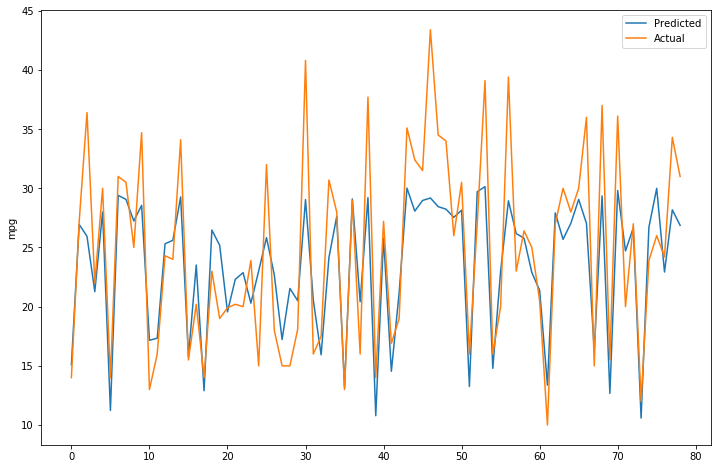

In [52]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [53]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.706070502455352
Test score 0.7075699127008527

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6791278821620288
Test score 0.6805375155661832



In [57]:
# Elastic Net Regression- Combination of L1 and L2 Norms

# alpha=1 default; for a real-world dataset ensure that normalize=True
# warm_start=True allows to reuse the solution of the previous call to fit as initialization, otherwise it would erase the prev solution and start fresh

def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5,
                   normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic net"):
    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,
                      normalize=normalize, max_iter=max_iter,warm_start=warm_start)
    model.fit(x_train,y_train)
    
    return model

Equivalent to: OLS
Training Score:  0.6978360523550152
Test Score:  0.7471589093443481


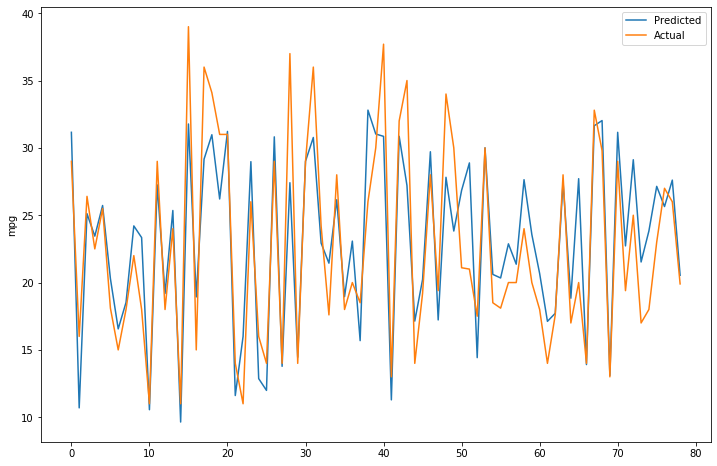

In [58]:
# To pass additional parameters for a defined function, use functools
# Running for OLS- not recommended but its a trial
from functools import partial

result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                       alpha=0, equivalent_to="OLS"),
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

Equivalent to: Lasso
Training Score:  0.7137908193935523
Test Score:  0.6678282385921934


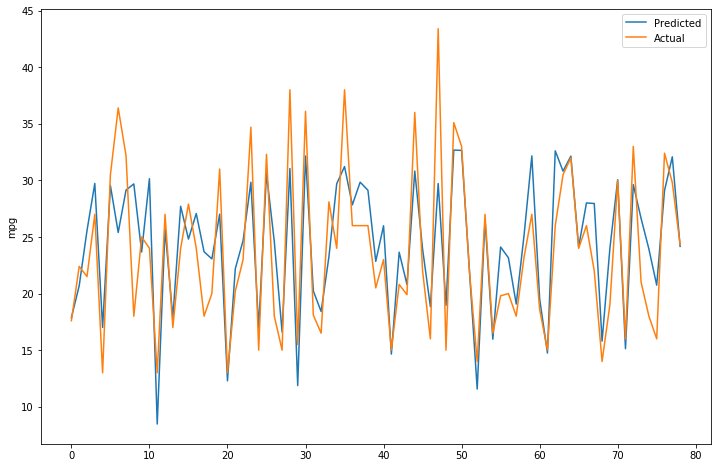

In [59]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1,l1_ratio=1 
                                                                          ,equivalent_to="Lasso"),
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

Equivalent to: Ridge
Training Score:  0.722705027326703
Test Score:  0.6000959293543338


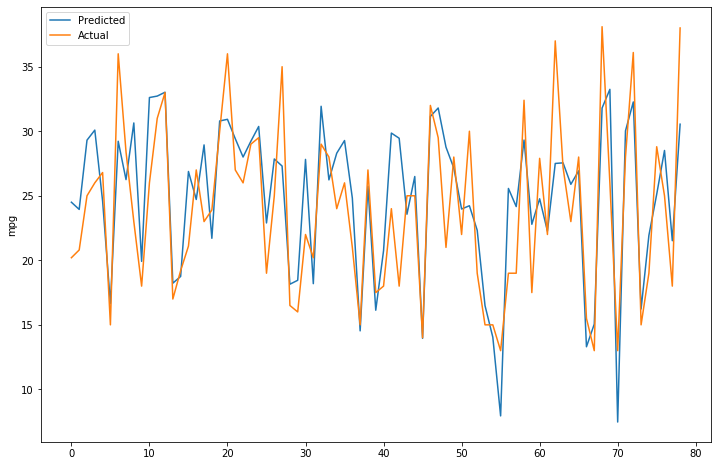

In [60]:
# Trying the same for ridge

result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1,l1_ratio=0 
                                                                          ,equivalent_to="Ridge"),
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

Equivalent to: Elastic net
Training Score:  0.7116383513381854
Test Score:  0.6884026345610901


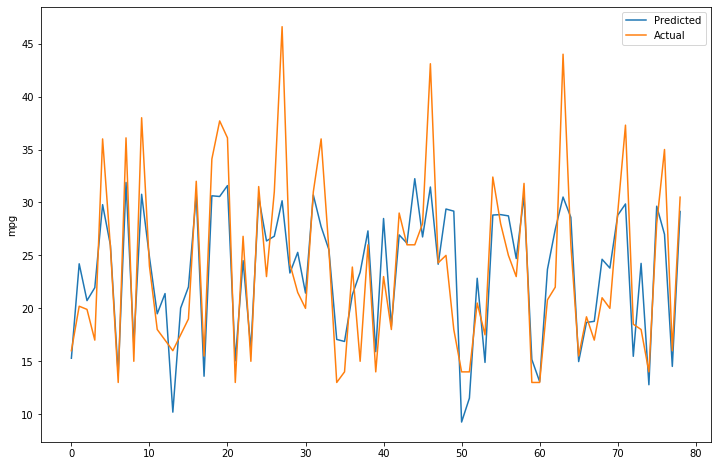

In [61]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1,l1_ratio=0.5 
                                                                          ),
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [62]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.706070502455352
Test score 0.7075699127008527

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6791278821620288
Test score 0.6805375155661832

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.6978360523550152
Test score 0.7471589093443481

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7137908193935523
Test score 0.6678282385921934

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.722705027326703
Test score 0.6000959293543338

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7116383513381854
Test score 0.6884026345610901



In [64]:
# SVR- Support Vector Regression
# Use LinearSVR while using a large dataset
# epsilon = margin = 2* epsilon, C is the penalty to apply to the points which lie outside the epsilon tube whiel calculating errors

def svr_reg(x_train,y_train, kernel='linear', epsilon=0.05,C=0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.708106837681832
Test Score:  0.658146924097667


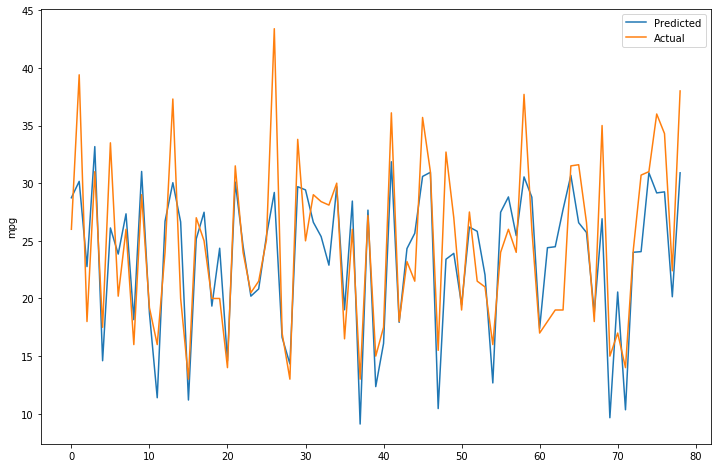

In [65]:
# Running the SVR
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [66]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.706070502455352
Test score 0.7075699127008527

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6791278821620288
Test score 0.6805375155661832

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.6978360523550152
Test score 0.7471589093443481

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7137908193935523
Test score 0.6678282385921934

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.722705027326703
Test score 0.6000959293543338

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7116383513381854
Test score 0.6884026345610901

Regression:  mpg ~ kitchen_sink_svr
Tr

In [67]:
# Implementing KNN

def kneighbors_reg(x_train,y_train,n_neighbors=10):
    model= KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.7512403175730098
Test Score:  0.758545867475617


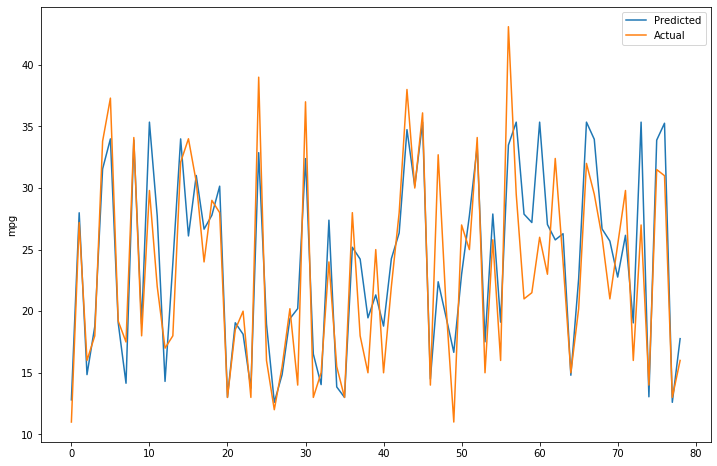

In [68]:
# Running the KNN
result_dict['mpg ~ kitchen_sink_knn'] = build_model(kneighbors_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [69]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6963472137004553
Test score 0.6623456526304518

Regression:  mpg ~ kitchen_sink_linear
Training score 0.7130875992244909
Test score 0.6765805353322207

Regression:  mpg ~ parsimonious_linear
Training score 0.7083103243728982
Test score 0.6946626252292911

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.706070502455352
Test score 0.7075699127008527

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6791278821620288
Test score 0.6805375155661832

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.6978360523550152
Test score 0.7471589093443481

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7137908193935523
Test score 0.6678282385921934

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.722705027326703
Test score 0.6000959293543338

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7116383513381854
Test score 0.6884026345610901

Regression:  mpg ~ kitchen_sink_svr
Tr

In [70]:
# Implementing SGD- Stochastic Gradient Descent
# Standardize the data- this means the mean will be 0 and variance will be 1

def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [71]:
# tol= tolerance, it is the stopping parameter for the model

def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.7023395170436899
Test Score:  0.7242299495073673


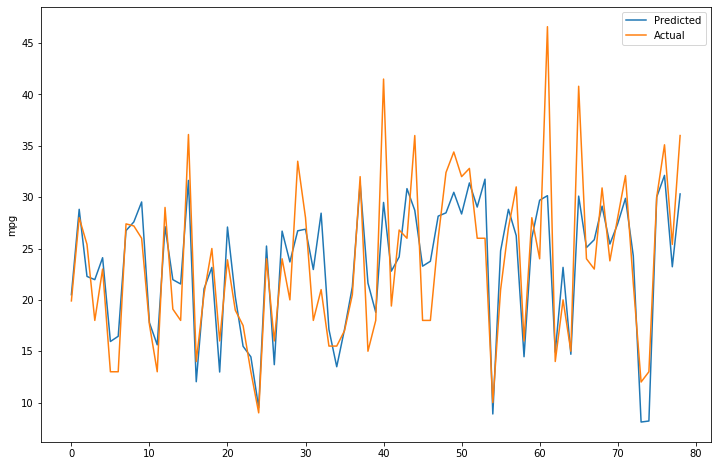

In [72]:
# Running the SGD

result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True,
                                                   preprocess_fn=apply_standard_scaler)

In [75]:
# Implementing Decision Tree Regressor

def decision_tree_reg(x_train,y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.736340386519444
Test Score:  0.7196739150421148


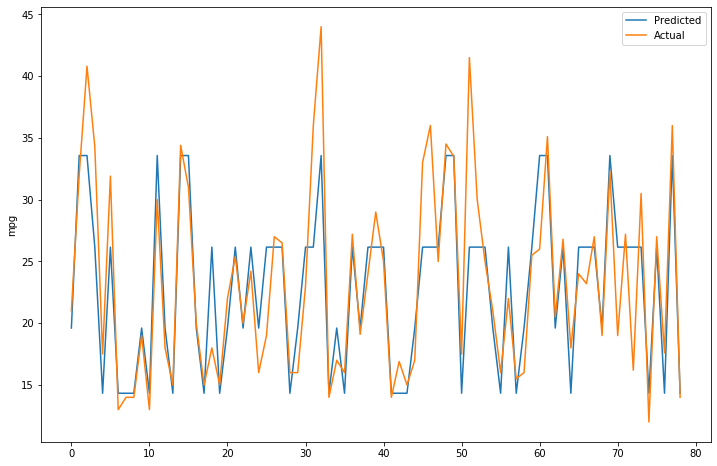

In [76]:
#Running the Decision Tree Regressor
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [77]:
# Implementing LARS (Least Angle Regression)

def lars_reg(x_train,y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.7147795758267592
Test Score:  0.6614983244500585


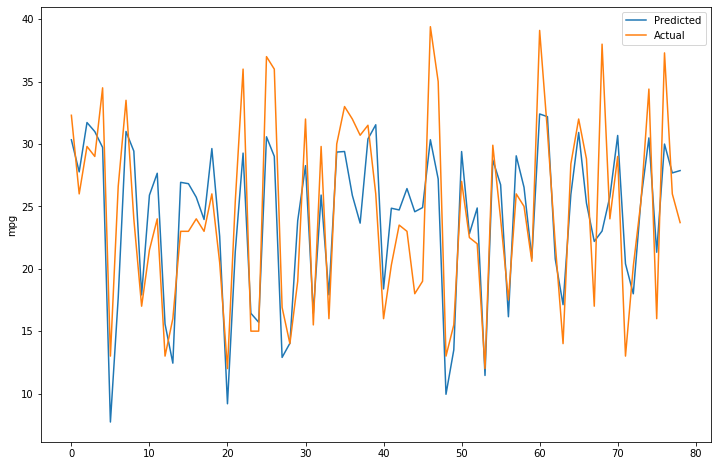

In [78]:
#Running the LARS model
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                     'mpg',
                                                     ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)